## import the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore')

## Loading the dataset

In [2]:
df_original = pd.read_csv("day.csv")
df_original.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [12]:
df_original.shape

(730, 16)

In [3]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [4]:
df_original.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


##  Visualising the data

In [6]:
df_original.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

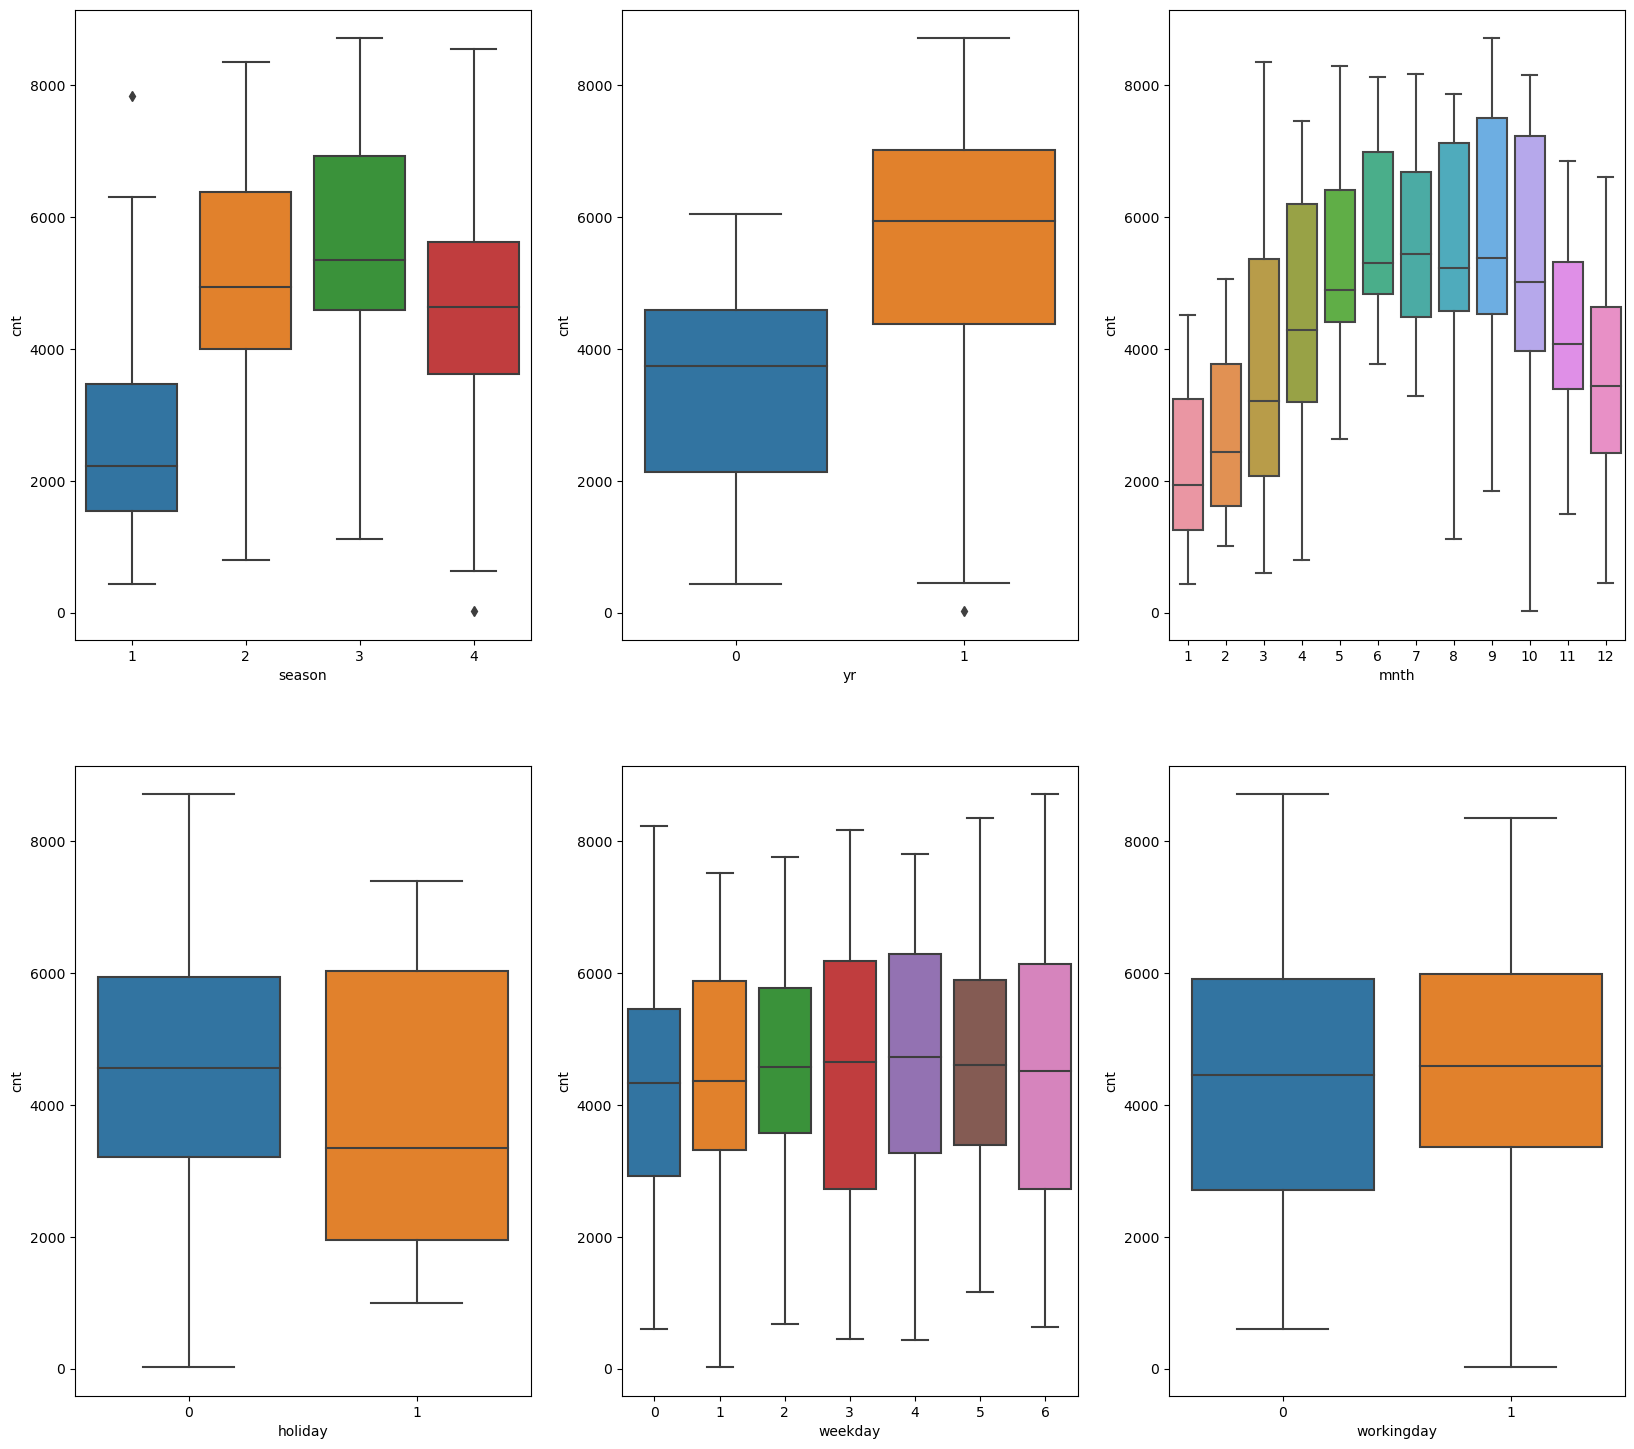

In [7]:
# visualising the Categorical variable
bikedata = df_original
plt.figure(figsize=(20,18))

plt.subplot(2,3,1)
sns.boxplot(x='season', y='cnt', data=df_original)

plt.subplot(2,3,2)
sns.boxplot(x='yr', y='cnt', data=df_original)

plt.subplot(2,3,3)
sns.boxplot(x='mnth', y='cnt', data=df_original)

plt.subplot(2,3,4)
sns.boxplot(x='holiday', y='cnt', data=df_original)

plt.subplot(2,3,5)
sns.boxplot(x='weekday', y='cnt', data=df_original)

plt.subplot(2,3,6)
sns.boxplot(x='workingday', y='cnt', data=df_original)

# plt.subplot(2,3,7)
# sns.boxplot(x='weathersit', y='cnt', data=df_original)


plt.show()

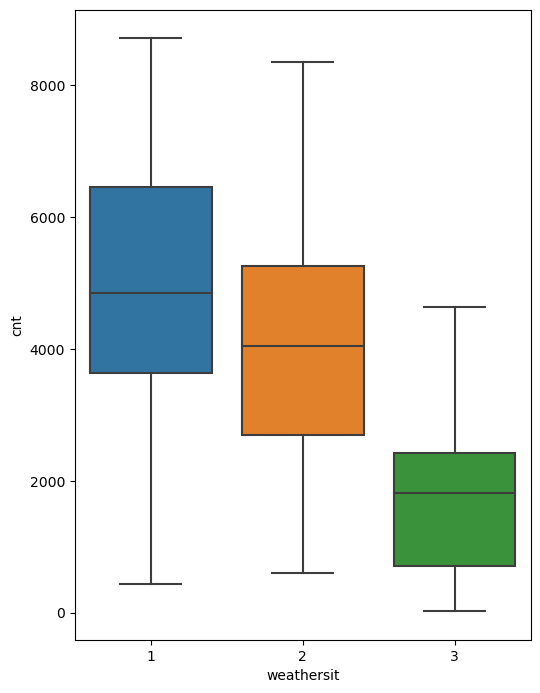

In [9]:
plt.figure(figsize=(20,18))
plt.subplot(2,3,1)
sns.boxplot(x='weathersit', y='cnt', data=df_original)

plt.show()

In [10]:
# we can distiguish that "season", "yr", "mnth", "weathersit" is 4 variables that distinguiishes cnt values

# we can also see Average cnt is significantly decreased for "holiday" as compared to other days

# we can see there is No* significant "cnt"  difference for  workingdays or not 


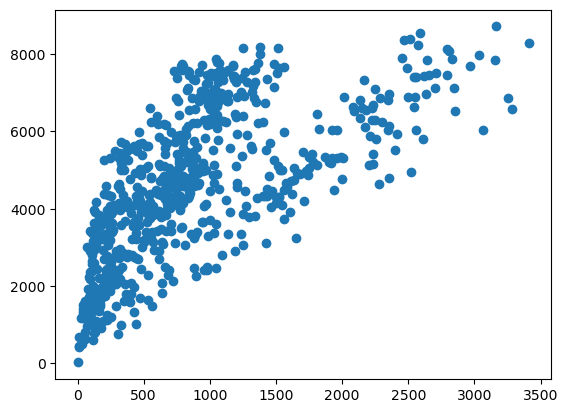

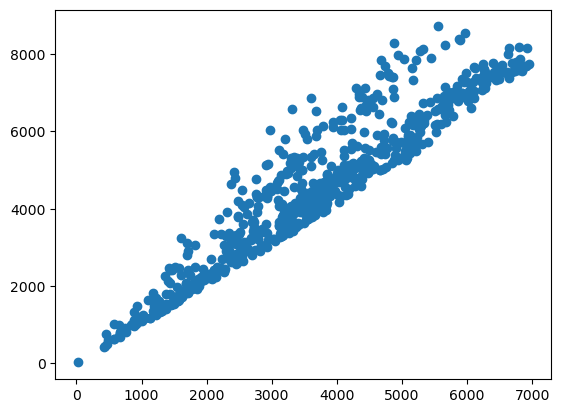

In [11]:
# casual vs cnt
plt.scatter(df_original['casual'], df_original['cnt'])  
plt.show() 

plt.scatter(df_original['registered'], df_original['cnt'])  
plt.show()
bikedata = bikedata.drop('casual', axis=1)
bikedata = bikedata.drop('registered', axis=1)

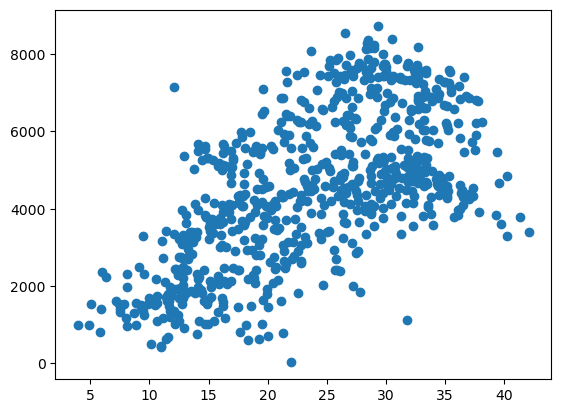

In [12]:
plt.scatter(df_original['atemp'], df_original['cnt'])  
plt.show() 

## Droping Unwanted Coulmns

In [13]:
df_original.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [14]:
bikedata['weathersit'].value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

In [15]:
bikedata = bikedata.drop('instant', axis=1) 
bikedata = bikedata.drop('dteday', axis=1) 
bikedata.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [16]:
# weathersit is not continuous var
bikedata['weathersit_clear'] = bikedata['weathersit'].apply(lambda x: 1 if x == 1 else 0 )
bikedata['weathersit_mist'] = bikedata['weathersit'].apply(lambda x: 1 if x == 2 else 0 )
bikedata['weathersit_light'] = bikedata['weathersit'].apply(lambda x: 1 if x == 3 else 0 )

In [17]:
bikedata['season_spring'] = bikedata['season'].apply(lambda x: 1 if x == 1 else 0 )
bikedata['season_summer'] = bikedata['season'].apply(lambda x: 1 if x == 2 else 0 )
bikedata['season_fall'] = bikedata['season'].apply(lambda x: 1 if x == 3 else 0 )

In [18]:
#drop season and weathersit
bikedata = bikedata.drop('season', axis=1)
bikedata = bikedata.drop('weathersit', axis=1)

In [19]:
# drop weekday 
bikedata = bikedata.drop('weekday', axis=1)

In [20]:
# lets drop mnth 
bikedata = bikedata.drop('mnth', axis=1)

In [21]:
#  drop temp
bikedata = bikedata.drop('temp', axis=1)
bikedata = bikedata.drop('hum', axis=1)
bikedata = bikedata.drop('windspeed', axis=1)

In [22]:
#bikedata = bikedata.drop('yr', axis=1)

In [23]:
bikedata.head()

,yr,holiday,workingday,atemp,cnt,weathersit_clear,weathersit_mist,weathersit_light,season_spring,season_summer,season_fall
0,0,0,0,18.18125,985,0,1,0,1,0,0
1,0,0,0,17.68695,801,0,1,0,1,0,0
2,0,0,1,9.47025,1349,1,0,0,1,0,0
3,0,0,1,10.60610,1562,1,0,0,1,0,0
4,0,0,1,11.46350,1600,1,0,0,1,0,0


## Train- Test Split

In [25]:
df_train, df_test = train_test_split(bikedata, train_size=0.70, random_state=100)
print(df_train.shape)
print(df_test.shape)


(510, 11)
(220, 11)


### Rescaling 

In [26]:
# 1. instantiate the object 
scaler = MinMaxScaler()

#num_var = ['temp', 'atemp', 'cnt', 'hum', 'windspeed']
num_var = ['atemp', 'cnt']
# rest variable are having 0 and 1 value so not needed scaling 

# 2 . Fit on data
df_train[num_var] = scaler.fit_transform(df_train[num_var])
df_train.head()

,yr,holiday,workingday,atemp,cnt,weathersit_clear,weathersit_mist,weathersit_light,season_spring,season_summer,season_fall
576,1,0,1,0.766351,0.827658,1,0,0,0,0,1
426,1,0,0,0.438975,0.465255,0,1,0,1,0,0
728,1,0,0,0.200348,0.204096,1,0,0,1,0,0
482,1,0,0,0.391735,0.482973,0,1,0,0,1,0
111,0,0,1,0.318819,0.191095,0,1,0,0,1,0


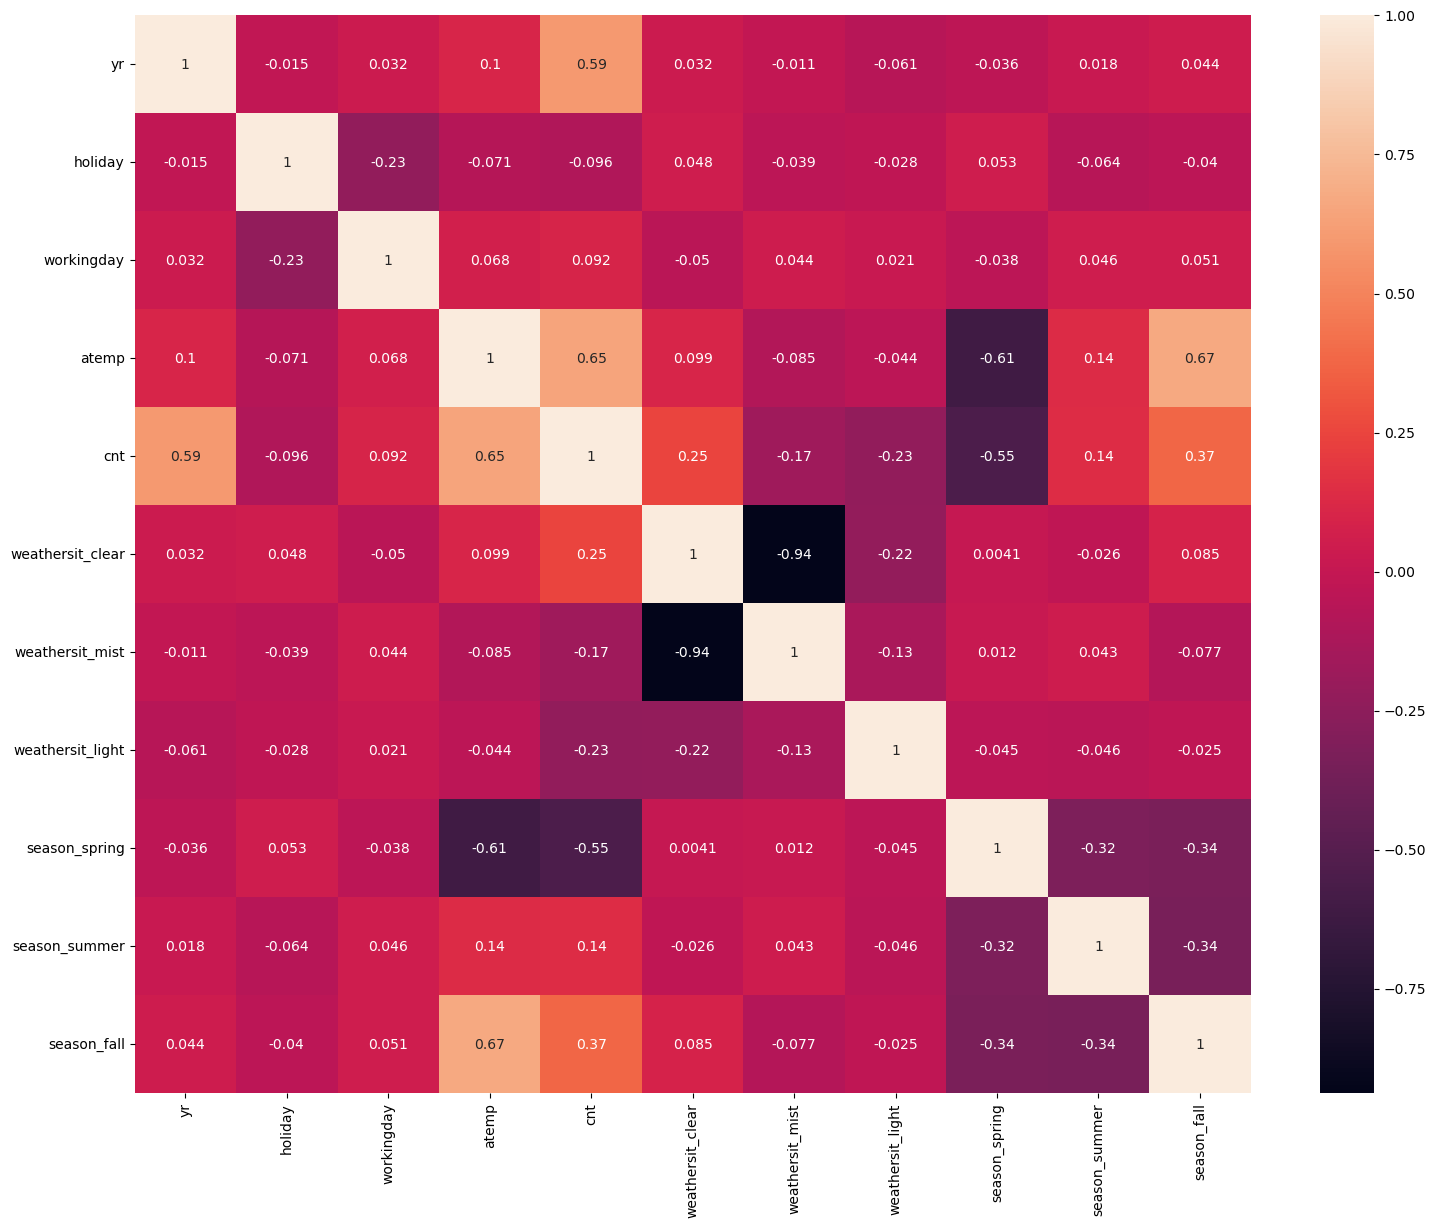

In [27]:
plt.figure(figsize = (18, 14))
sns.heatmap(df_train.corr(), annot=True)
plt.show()

##  Creating Model 

In [28]:
# we have to get X_train,  which is all the column  except the Y. Y is cnt 

# X_train , y_train

y_train = df_train.pop('cnt')

X_train = df_train

In [29]:
X_train_sm = X_train
X_train_sm = sm.add_constant(X_train_sm)
# again repeat 

# lets create amodel for now 
lr = sm.OLS(y_train, X_train_sm)

# fit 
lr_model = lr.fit()

# params

lr_model.params

const               0.087017
yr                  0.233827
holiday            -0.072969
workingday          0.019800
atemp               0.481303
weathersit_clear    0.150258
weathersit_mist     0.075797
weathersit_light   -0.139038
season_spring      -0.167799
season_summer      -0.043295
season_fall        -0.058388
dtype: float64

In [45]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.737
Method:                 Least Squares   F-statistic:                     179.6
Date:                Wed, 20 Dec 2023   Prob (F-statistic):          7.93e-142
Time:                        15:46:01   Log-Likelihood:                 383.79
No. Observations:                 510   AIC:                            -749.6
Df Residuals:                     501   BIC:                            -711.5
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.4447      0.014     31.117      0.000       0.417       0.473
yr                   0.2456      0.010     24.011      0.000       0.226       0.266
holiday             -0.0806      0.033     -2.416      0.016      -0.146      -0.015
workingday           0.0220      0.011      1.959      0.051   -6.39e-05       0.044
weathersit_mist     -0.0846      0.011     -7.789      0.000      -0.106      -0.063
weathersit_light    -0.3095      0.031    -10.080      0.000      -0.370      -0.249
season_spring       -0.2411      0.015    -16.485      0.000      -0.270      -0.212
season_summer        0.0171      0.015      1.170      0.242      -0.012       0.046
season_fall          0.0912      0.014      6.317      0.000       0.063       0.120
==============================================================================
Omnibus:                       31.487   Durbin-Watson:                   2.034
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               84.294
Skew:                          -0.255   Prob(JB):                     4.96e-19
Kurtosis:                       4.925   Cond. No.                         9.74
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
# create a dataframe that will have all the feature variable and thr VIF
vif = pd.DataFrame()
vif['Feature'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1]) ]
vif['VIF'] = round(vif['VIF'] , 2)
vif = vif.sort_values(by = 'VIF', ascending=False)
vif

,Feature,VIF
4,weathersit_clear,12.68
5,weathersit_mist,6.98
3,atemp,3.01
9,season_fall,2.80
7,season_spring,1.80
8,season_summer,1.73
6,weathersit_light,1.41
1,holiday,1.07
2,workingday,1.07
0,yr,1.02


In [33]:
# now we have variable with 
#1. High P value and high VIF ---  Drop
#2. High P value and low VIF -- remove this first 
#3. Low P value and High VIF -- remove this after the one above
#4. Low P value and Low VIF ---  is significant


X_train = X_train.drop('weathersit_clear', axis=1)

In [34]:
X_train_sm = X_train
X_train_sm = sm.add_constant(X_train_sm)
# again repeat 

# lets create amodel for now 
lr = sm.OLS(y_train, X_train_sm)

# fit 
lr_model = lr.fit()

# params

lr_model.params

const               0.237275
yr                  0.233827
holiday            -0.072969
workingday          0.019800
atemp               0.481303
weathersit_mist    -0.074461
weathersit_light   -0.289296
season_spring      -0.167799
season_summer      -0.043295
season_fall        -0.058388
dtype: float64

In [35]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     237.4
Date:                Wed, 20 Dec 2023   Prob (F-statistic):          3.06e-174
Time:                        15:32:14   Log-Likelihood:                 462.91
No. Observations:                 510   AIC:                            -905.8
Df Residuals:                     500   BIC:                            -863.5
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2373      0.020     12.069      0.000       0.199       0.276
yr                   0.2338      0.009     26.538      0.000       0.217       0.251
holiday             -0.0730      0.029     -2.551      0.011      -0.129      -0.017
workingday           0.0198      0.010      2.055      0.040       0.001       0.039
atemp                0.4813      0.036     13.487      0.000       0.411       0.551
weathersit_mist     -0.0745      0.009     -7.972      0.000      -0.093      -0.056
weathersit_light    -0.2893      0.026    -10.975      0.000      -0.341      -0.238
season_spring       -0.1678      0.014    -12.278      0.000      -0.195      -0.141
season_summer       -0.0433      0.013     -3.252      0.001      -0.069      -0.017
season_fall         -0.0584      0.017     -3.515      0.000      -0.091      -0.026
==============================================================================
Omnibus:                       64.358   Durbin-Watson:                   2.030
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              180.997
Skew:                          -0.609   Prob(JB):                     4.98e-40
Kurtosis:                       5.652   Cond. No.                         14.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
# again calculate the VIF
vif = pd.DataFrame()
vif['Feature'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1]) ]
vif['VIF'] = round(vif['VIF'] , 2)
vif = vif.sort_values(by = 'VIF', ascending=False)
vif

,Feature,VIF
3,atemp,8.00
8,season_fall,3.49
2,workingday,3.02
7,season_summer,2.30
0,yr,2.03
6,season_spring,1.50
4,weathersit_mist,1.49
1,holiday,1.07
5,weathersit_light,1.05


In [37]:
# experimewnt on models 

# Model 2
X_train = X_train.drop('atemp', axis=1)
X_train_sm = X_train
X_train_sm = sm.add_constant(X_train_sm)
# again repeat 

# lets create amodel for now 
lr = sm.OLS(y_train, X_train_sm)

# fit 
lr_model = lr.fit()

print(lr_model.summary())

# again calculate the VIF
vif = pd.DataFrame()
vif['Feature'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1]) ]
vif['VIF'] = round(vif['VIF'] , 2)
vif = vif.sort_values(by = 'VIF', ascending=False)
print(vif)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.737
Method:                 Least Squares   F-statistic:                     179.6
Date:                Wed, 20 Dec 2023   Prob (F-statistic):          7.93e-142
Time:                        15:32:16   Log-Likelihood:                 383.79
No. Observations:                 510   AIC:                            -749.6
Df Residuals:                     501   BIC:                            -711.5
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.4447      0.014  

##  Residual Analysis

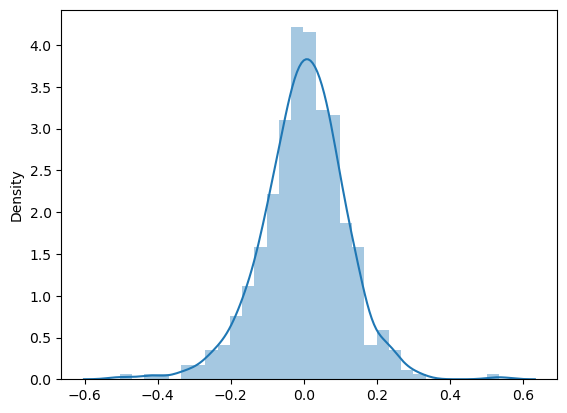

In [38]:
y_train_pred = lr_model.predict(X_train_sm)
#y_train_pred
res = y_train - y_train_pred
sns.distplot(res)
plt.show()

## Prediction and Evaluation on test set

In [39]:
# before prediction  on test set we need to scale the test data same like for train data
# important point is we do not fit the scaler on test data set 


num_var = ['atemp', 'cnt']

# transforming / scalar
df_test[num_var] = scaler.transform(df_test[num_var])
df_test.head()

,yr,holiday,workingday,atemp,cnt,weathersit_clear,weathersit_mist,weathersit_light,season_spring,season_summer,season_fall
184,0,1,0,0.769660,0.692706,0,1,0,0,0,1
535,1,0,1,0.842587,0.712034,1,0,0,0,1,0
299,0,0,1,0.496145,0.303382,0,1,0,0,0,0
221,0,0,1,0.795343,0.547400,1,0,0,0,0,1
152,0,0,1,0.741471,0.569029,1,0,0,0,1,0


In [40]:
df_test.describe()

,yr,holiday,workingday,atemp,cnt,weathersit_clear,weathersit_mist,weathersit_light,season_spring,season_summer,season_fall
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.700000,0.532847,0.522154,0.654545,0.318182,0.027273,0.254545,0.263636,0.245455
std,0.500809,0.187620,0.459303,0.217401,0.219163,0.476601,0.466833,0.163248,0.436599,0.441609,0.431338
min,0.000000,0.000000,0.000000,0.025950,0.048205,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.344870,0.378595,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.544652,0.524678,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.713308,0.677750,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.980934,0.963300,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [41]:
# now the data is ready to be separated into x test and y test 

y_test = df_test.pop('cnt')
X_test = df_test

# will add constant like we added before for train data
X_test_sm = sm.add_constant(X_test)
X_test_sm.head()

,const,yr,holiday,workingday,atemp,weathersit_clear,weathersit_mist,weathersit_light,season_spring,season_summer,season_fall
184,1.0,0,1,0,0.769660,0,1,0,0,0,1
535,1.0,1,0,1,0.842587,1,0,0,0,1,0
299,1.0,0,0,1,0.496145,0,1,0,0,0,0
221,1.0,0,0,1,0.795343,1,0,0,0,0,1
152,1.0,0,0,1,0.741471,1,0,0,0,1,0


In [42]:
# drop the same columns which we had dropped for training
X_test_sm = X_test_sm.drop(['weathersit_clear','atemp'], axis=1)

In [43]:
# Predition 
y_test_pred = lr_model.predict(X_test_sm)

In [44]:
# evaluate
r2_score(y_true=y_test, y_pred=y_test_pred)

0.7441585262276822

### Conclusion is Model is valid with adjusted R2-squared value (73.8%) of Trained  almost equal to  r2_score (74.4%) of Test Data.  
###  Acuracy of Model is Aprox 73%